## The Hobbit - Or there and back again

### Book analysis

In [25]:
from nltk.tokenize import sent_tokenize
import nltk
from nltk.corpus import words
from nltk.stem import WordNetLemmatizer
from nltk.sentiment.vader import SentimentIntensityAnalyzer

import string
import re
import pandas as pd
import numpy as np
from operator import itemgetter

import matplotlib.pyplot as plt
import matplotlib
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

%matplotlib inline

## Cleaning data

In [2]:
nltk.download()

showing info https://raw.githubusercontent.com/nltk/nltk_data/gh-pages/index.xml


True

In [18]:
text = open('hobbit.txt', 'r').read()

In [19]:
text[:100]

'\n\n\n\n\n\n\nTHE HOBBIT \n\n\n\nOR \n\nTHERE AND BACK \nAGAIN \n\n\n\nJ.R.R. TOLKIEN \n\n\n\nThe Hobbit is a tale of high'

In [20]:
text = text.replace('\n', '')

In [23]:
sentences = nltk.sent_tokenize(text)

In [24]:
len(sentences)

4915

In [12]:
sentences[1]

'TOLKIEN The Hobbit is a tale of high adventure, undertaken by a company of dwarves, in search of dragon-guarded gold.'

In [13]:
# Remove some annotations
sentences = sentences[34:4904]

In [14]:
sentences[-1]

'You are a very fine person, Mr. Baggins, and I am very fond of you; but you are only quite a little fellow in a wide world after all!” “Thank goodness!” said Bilbo laughing, and handed him the tobacco-jar.'

In [15]:
sentences[0]

'Chapter I AN UNEXPECTED PARTY In a hole in the ground there lived a hobbit.'

## Sentiment Analysis

In [17]:
sid = SentimentIntensityAnalyzer()

In [18]:
compound_scores = []
for sentence in sentences:
    compound_scores.append((sentence, sid.polarity_scores(sentence)['compound'],
                            sid.polarity_scores(sentence)['pos'],
                           sid.polarity_scores(sentence)['neg'],
                           sid.polarity_scores(sentence)['neu']))

In [19]:
compound_scores[1]

('Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: it was a hobbit-hole, and that means comfort.',
 0.7802,
 0.179,
 0.0,
 0.821)

In [20]:
i = 0
for el in compound_scores:
    if el[1] > 0:
        print(el, '\n')
        i += 1
    if i > 5:
        break

('Chapter I AN UNEXPECTED PARTY In a hole in the ground there lived a hobbit.', 0.5319, 0.238, 0.0, 0.762) 

('Not a nasty, dirty, wet hole, filled with the ends of worms and an oozy smell, nor yet a dry, bare, sandy hole with nothing in it to sit down on or to eat: it was a hobbit-hole, and that means comfort.', 0.7802, 0.179, 0.0, 0.821) 

('It had a perfectly round door like a porthole, painted green, with a shiny yellow brass knob in the exact middle.', 0.7717, 0.295, 0.0, 0.705) 

('The door opened on to a tube-shaped hall like a tunnel: a very comfortable tunnel without smoke, with panelled walls, and floors tiled and carpeted, provided with polished chairs, and lots and lots of pegs for hats and coats — the hobbit was fond of visitors.', 0.8399, 0.187, 0.0, 0.813) 

('No going upstairs for the hobbit: bedrooms, bathrooms, cellars, pantries (lots of these), wardrobes (he had whole rooms devoted to clothes), kitchens, dining-rooms, all were on the same floor, and indeed on the sam

In [21]:
i = 0
for el in compound_scores:
    if el[1] < 0:
        print(el, '\n')
        i += 1
    if i > 5:
        break

('The tunnel wound on and on, going fairly but not quite straight into the side of the hill — The Hill, as all the people for many miles round called it — and many little round doors opened out of it, first on one side and then on another.', -0.3235, 0.0, 0.048, 0.952) 

('I suppose hobbits need some description nowadays, since they have become rare and shy of the Big People, as they call us.', -0.25, 0.0, 0.091, 0.909) 

('Hobbits have no beards.', -0.296, 0.0, 0.423, 0.577) 

('He had not been down that way under The Hill for ages and ages, not since his friend the Old Took died, in fact, and the hobbits had almost forgotten what he looked like.', -0.6525, 0.062, 0.194, 0.744) 

('But Gandalf looked at him from under long bushy eyebrows that stuck out further than the brim of his shady hat.', -0.25, 0.0, 0.091, 0.909) 

('“But I have no time to blow smoke-rings this morning.', -0.296, 0.0, 0.216, 0.784) 



In [22]:
all_scores = []
for el in compound_scores:
    all_scores.append(el[1])

for el in compound_scores:
    if el[1] == max(all_scores):
        print('\nMost positive compound score was assigned to: \n', el)
    elif el[1] == min(all_scores):
        print('\nMost negative compound score assigned to: \n', el)

    


Most negative compound score assigned to: 
 ('There were lots of dragons in the North in those days, and gold was probably getting scarce up there, with the dwarves flying south or getting killed, and all the general waste and destruction that dragons make going from bad to worse.', -0.9559, 0.0, 0.322, 0.678)

Most positive compound score was assigned to: 
 ('Beorn was most jolly for a change; indeed he seemed to be in a splendidly good humour and set them all laughing with his funny stories; nor did they have to wonder long where he had been or why he was so nice to them, for he told them himself.', 0.9698, 0.353, 0.0, 0.647)


In [23]:
df = pd.DataFrame(compound_scores)

In [24]:
df.head(10)

,0,1,2,3,4
0,Chapter I AN UNEXPECTED PARTY In a hole in the...,0.5319,0.238,0.000,0.762
1,"Not a nasty, dirty, wet hole, filled with the ...",0.7802,0.179,0.000,0.821
2,"It had a perfectly round door like a porthole,...",0.7717,0.295,0.000,0.705
3,The door opened on to a tube-shaped hall like ...,0.8399,0.187,0.000,0.813
4,"The tunnel wound on and on, going fairly but n...",-0.3235,0.000,0.048,0.952
5,"No going upstairs for the hobbit: bedrooms, ba...",0.1280,0.071,0.058,0.871
6,The best rooms were all on the left-hand side ...,0.6369,0.110,0.000,0.890
7,"This hobbit was a very well-to-do hobbit, and ...",0.0000,0.000,0.000,1.000
8,The Bagginses had lived in the neighbourhood o...,0.5262,0.111,0.041,0.848
9,This is a story of how a Baggins had an advent...,0.3182,0.119,0.000,0.881


In [25]:
df['chapter'] = np.where(df[0].str.startswith('Chapter'),
                         df[0].str.split(' ').str[:2], np.nan)

In [26]:
df.fillna(method='ffill', inplace=True)
df.dropna(inplace=True)
df.head()

,0,1,2,3,4,chapter
0,Chapter I AN UNEXPECTED PARTY In a hole in the...,0.5319,0.238,0.000,0.762,"[Chapter, I]"
1,"Not a nasty, dirty, wet hole, filled with the ...",0.7802,0.179,0.000,0.821,"[Chapter, I]"
2,"It had a perfectly round door like a porthole,...",0.7717,0.295,0.000,0.705,"[Chapter, I]"
3,The door opened on to a tube-shaped hall like ...,0.8399,0.187,0.000,0.813,"[Chapter, I]"
4,"The tunnel wound on and on, going fairly but n...",-0.3235,0.000,0.048,0.952,"[Chapter, I]"


In [27]:
df.drop(df.loc[df[0].str.startswith('Chapter')].index, inplace=True)

In [28]:
df.columns = ['sentences', 'compound_score', 'pos_score', 'neg_score', 'neu_score', 'chapter']

In [29]:
df['chapter'] = df['chapter'].str[0] + ' ' + df['chapter'].str[1]

In [30]:
df.head()

,sentences,compound_score,pos_score,neg_score,neu_score,chapter
1,"Not a nasty, dirty, wet hole, filled with the ...",0.7802,0.179,0.000,0.821,Chapter I
2,"It had a perfectly round door like a porthole,...",0.7717,0.295,0.000,0.705,Chapter I
3,The door opened on to a tube-shaped hall like ...,0.8399,0.187,0.000,0.813,Chapter I
4,"The tunnel wound on and on, going fairly but n...",-0.3235,0.000,0.048,0.952,Chapter I
5,"No going upstairs for the hobbit: bedrooms, ba...",0.1280,0.071,0.058,0.871,Chapter I


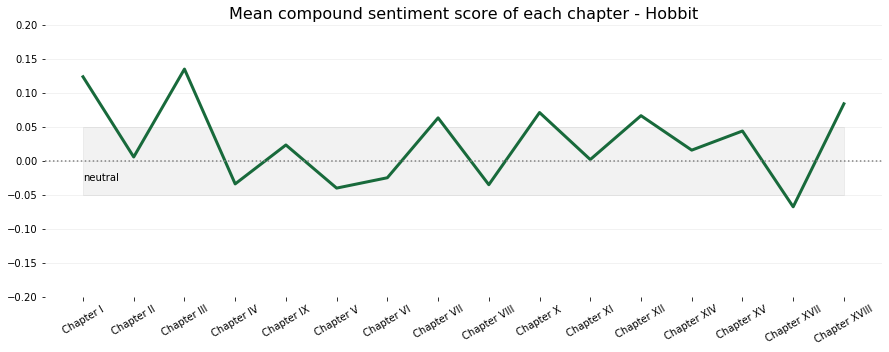

In [31]:
fig, ax = plt.subplots(figsize=(15,5))
ax.plot(df.groupby('chapter').mean()['compound_score'].index,
        df.groupby('chapter').mean()['compound_score'].values, linewidth=3, color="#186A3B")
ax.set_xticklabels(df.groupby('chapter').mean()['compound_score'].index,
                   rotation=30)
ax.set_ylim(-0.2, 0.2)
ax.axhline(y=0, linestyle=':', color='grey')
ax.set_title('Mean compound sentiment score of each chapter - Hobbit', fontsize=16)
ax.spines['top'].set_visible(False)
ax.fill_between(x=ax.get_xticks(), y1=-0.05, y2=0.05, color='grey', alpha=0.1)
ax.spines['right'].set_visible(False)
ax.text(x=0, y=-0.03, s='neutral')
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(alpha=0.2);

In [32]:
# dropping the pos, neg, neu scores returned from Vader and assigning them based on compound score thresholds.
df['pos_score'] = np.where(df['compound_score'] >= 0.05, 1, 0)
df['neg_score'] = np.where(df['compound_score'] <= -0.05, 1, 0)
df['neu_score'] = np.where((df['compound_score'] > -0.05) &
                           (df['compound_score'] < 0.05), 1, 0)

In [33]:
len(df[df['pos_score'] == 1])

1547

In [34]:
len(df[df['neg_score'] == 1])

1383

In [35]:
len(df[df['neu_score'] == 1])

1922

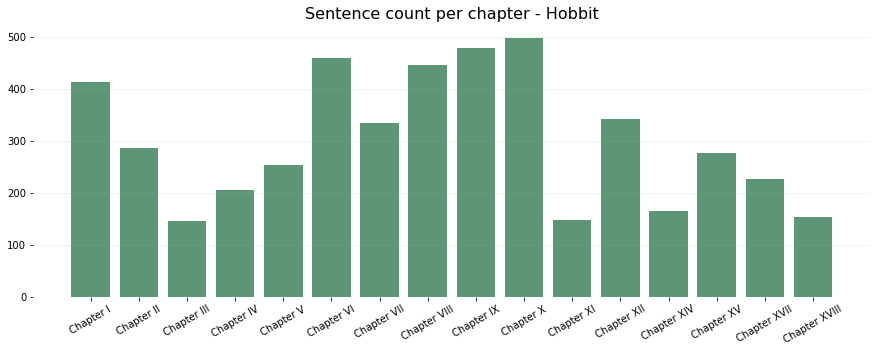

In [124]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x=df.groupby('chapter').nunique()['sentences'].index, 
        height=df.groupby('chapter').nunique()['sentences'].values, alpha=0.7, color='#186A3B')
ax.set_xticklabels(df['chapter'].unique(),
                   rotation=30)
ax.set_title('Sentence count per chapter - Hobbit', fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(alpha=0.2);

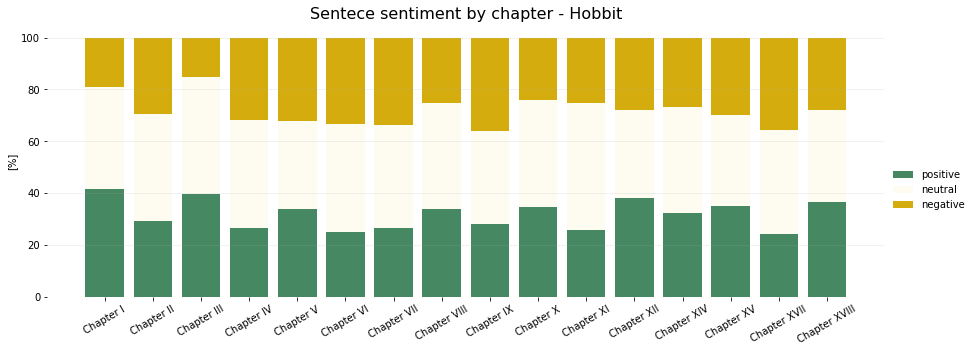

In [37]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x=df[df['pos_score'] == 1].groupby('chapter').nunique()['sentences'].index, 
        height=df[df['pos_score'] == 1].groupby('chapter').nunique()['sentences'].values / df.groupby('chapter').nunique()['sentences'] * 100, alpha=0.8,
      label='positive', color='#186A3B')

ax.bar(x=df[df['neu_score'] == 1].groupby('chapter').nunique()['sentences'].index, 
        height=df[df['neu_score'] == 1].groupby('chapter').nunique()['sentences'].values / df.groupby('chapter').nunique()['sentences'] * 100, alpha=0.3,
       bottom=df[df['pos_score'] == 1].groupby('chapter').nunique()['sentences'].values / df.groupby('chapter').nunique()['sentences'] * 100,
       label='neutral', color='#FCF3CF')

ax.bar(x=df[df['neg_score'] == 1].groupby('chapter').nunique()['sentences'].index, 
        height=df[df['neg_score'] == 1].groupby('chapter').nunique()['sentences'].values / df.groupby('chapter').nunique()['sentences'] * 100,
       bottom=(df[df['neu_score'] == 1].groupby('chapter').nunique()['sentences'].values / df.groupby('chapter').nunique()['sentences'] * 100) +
       (df[df['pos_score'] == 1].groupby('chapter').nunique()['sentences'].values / df.groupby('chapter').nunique()['sentences'] * 100),
       label='negative', color='#D4AC0D')


ax.legend(frameon=False, bbox_to_anchor=(1, 0.5))

ax.set_xticklabels(df['chapter'].unique(),
                   rotation=30)
ax.set_title('Sentece sentiment by chapter - Hobbit', fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_ylabel('[%]')
ax.yaxis.grid(alpha=0.2);

In [38]:
df['sentences_length'] = df['sentences'].apply(lambda x: len(x.split(' ')))

In [39]:
df.head()

,sentences,compound_score,pos_score,neg_score,neu_score,chapter,sentences_length
1,"Not a nasty, dirty, wet hole, filled with the ...",0.7802,1,0,0,Chapter I,42
2,"It had a perfectly round door like a porthole,...",0.7717,1,0,0,Chapter I,21
3,The door opened on to a tube-shaped hall like ...,0.8399,1,0,0,Chapter I,46
4,"The tunnel wound on and on, going fairly but n...",-0.3235,0,1,0,Chapter I,49
5,"No going upstairs for the hobbit: bedrooms, ba...",0.1280,1,0,0,Chapter I,35


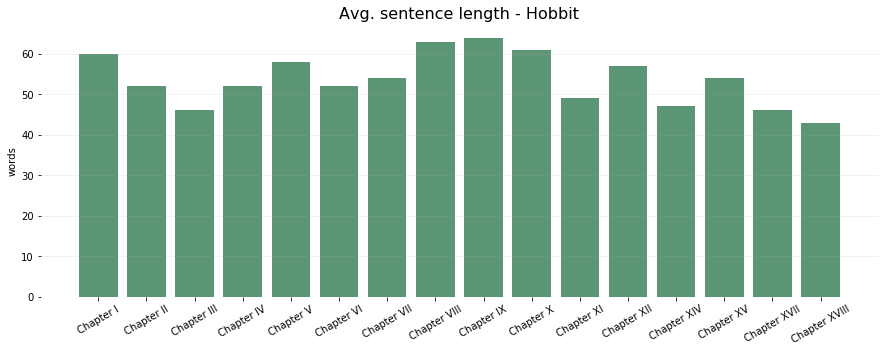

In [40]:
fig, ax = plt.subplots(figsize=(15,5))
ax.bar(x=df.groupby('chapter').nunique()['sentences_length'].index, 
        height=df.groupby('chapter').nunique()['sentences_length'].values, alpha=0.7, color='#186A3B')
ax.set_xticklabels(df['chapter'].unique(),
                   rotation=30)
ax.set_title('Avg. sentence length - Hobbit', fontsize=16)
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(alpha=0.2)
ax.set_ylabel('words');

## Text analysis

In [41]:
string.punctuation += '“”‘—'

In [42]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~“”‘—'

In [43]:
# clean senteces from punctuation
translator = str.maketrans('', '', string.punctuation)

df['cleaned_sentences'] = df['sentences'].apply(lambda x: x.translate(translator))
df['cleaned_sentences'] = df['cleaned_sentences'].str.strip()

In [44]:
df['cleaned_sentences'] = df['cleaned_sentences'].str.replace('  ', ' ')

In [45]:
df['cleaned_sentences'] = df['cleaned_sentences'].str.replace('  ', ' ')

In [46]:
df['cleaned_sentences'].loc[1989]

'They surprised us at night in a pass which we had to cross we were coming out of the Lands over West into these countries it is a long tale Then you had better come inside and tell me some of it if it won’t take all day said the man leading the way through a dark door that opened out of the courtyard into the house'

In [47]:
df.reset_index(inplace=True)

In [48]:
for i in range(len(df)):
    if df['cleaned_sentences'].loc[i] == '':
        df['cleaned_sentences'].loc[i] = 'none'

#### named entities

In [49]:
df['tagged_sent'] = df['cleaned_sentences'].str.split(' ').apply(lambda x: nltk.pos_tag(x))

In [50]:
df.loc[500]['tagged_sent']

[('Then', 'RB'),
 ('the', 'DT'),
 ('rain', 'NN'),
 ('began', 'VBD'),
 ('to', 'TO'),
 ('pour', 'VB'),
 ('down', 'RP'),
 ('worse', 'JJR'),
 ('than', 'IN'),
 ('ever', 'RB'),
 ('and', 'CC'),
 ('Oin', 'NNP'),
 ('and', 'CC'),
 ('Gloin', 'NNP'),
 ('began', 'VBD'),
 ('to', 'TO'),
 ('fight', 'VB')]

In [51]:
df.loc[205]['tagged_sent']

[('Bilbo', 'NNP'),
 ('stood', 'VBD'),
 ('still', 'RB'),
 ('and', 'CC'),
 ('watched', 'VBD'),
 ('he', 'PRP'),
 ('loved', 'VBD'),
 ('smokerings', 'NNS'),
 ('and', 'CC'),
 ('then', 'RB'),
 ('he', 'PRP'),
 ('blushed', 'VBD'),
 ('to', 'TO'),
 ('think', 'VB'),
 ('how', 'WRB'),
 ('proud', 'JJ'),
 ('he', 'PRP'),
 ('had', 'VBD'),
 ('been', 'VBN'),
 ('yesterday', 'NN'),
 ('morning', 'NN'),
 ('of', 'IN'),
 ('the', 'DT'),
 ('smokerings', 'NNS'),
 ('he', 'PRP'),
 ('had', 'VBD'),
 ('sent', 'VBN'),
 ('up', 'RP'),
 ('the', 'DT'),
 ('wind', 'NN'),
 ('over', 'IN'),
 ('The', 'DT'),
 ('Hill', 'NNP')]

In [52]:
df['ne'] = df['tagged_sent'].apply(lambda x: nltk.ne_chunk(x, binary=True))

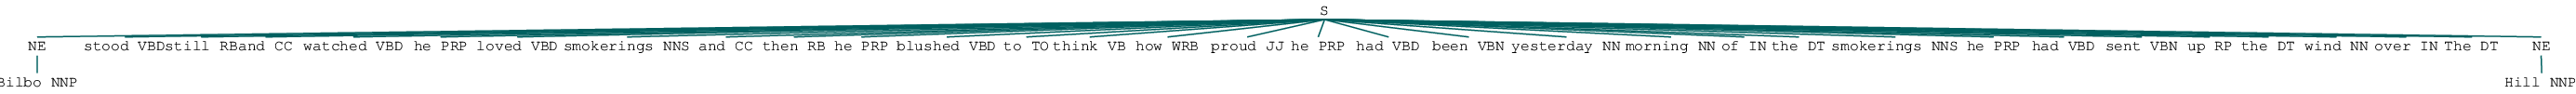

In [53]:
df.loc[205]['ne']

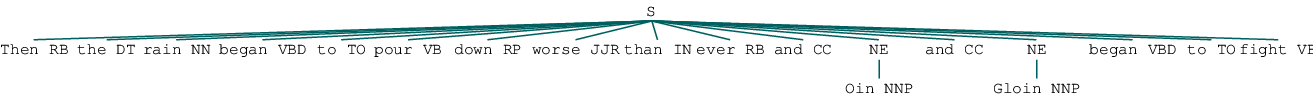

In [54]:
df.loc[500]['ne']

In [55]:
df.loc[205]['ne'].subtrees

<bound method Tree.subtrees of Tree('S', [Tree('NE', [('Bilbo', 'NNP')]), ('stood', 'VBD'), ('still', 'RB'), ('and', 'CC'), ('watched', 'VBD'), ('he', 'PRP'), ('loved', 'VBD'), ('smokerings', 'NNS'), ('and', 'CC'), ('then', 'RB'), ('he', 'PRP'), ('blushed', 'VBD'), ('to', 'TO'), ('think', 'VB'), ('how', 'WRB'), ('proud', 'JJ'), ('he', 'PRP'), ('had', 'VBD'), ('been', 'VBN'), ('yesterday', 'NN'), ('morning', 'NN'), ('of', 'IN'), ('the', 'DT'), ('smokerings', 'NNS'), ('he', 'PRP'), ('had', 'VBD'), ('sent', 'VBN'), ('up', 'RP'), ('the', 'DT'), ('wind', 'NN'), ('over', 'IN'), ('The', 'DT'), Tree('NE', [('Hill', 'NNP')])])>

In [56]:
# change named entities to a list
df['named_entities'] = ''

for i in range(len(df)):
    df['named_entities'].loc[i] = [" ".join(w for w, t in elt) for elt in df.loc[i]['ne'] if isinstance(elt, nltk.Tree)]


In [57]:
df.loc[205]['named_entities']

['Bilbo', 'Hill']

In [58]:
# split two-word named entities
df['named_entities'] = df['named_entities'].apply(lambda x: [el.split(' ') for el in x])

In [59]:
# flatten named entities list
df['named_entities'] = df['named_entities'].apply(lambda x: [item for sublist in x for item in sublist])

In [60]:
df['named_entities'].loc[205]

['Bilbo', 'Hill']

In [62]:
wordnet_lemmatizer = WordNetLemmatizer()

In [63]:
wordnet_lemmatizer.lemmatize('bilbo', 'v') in words.words()

True

In [64]:
wordnet_lemmatizer.lemmatize('gandalf', 'v') in words.words()

False

In [65]:
# now I want to remove false entities that are common words but because of being capitalised were counted as named entities
df['named_entities'] = df['named_entities'].apply(lambda x: [el for el in x if wordnet_lemmatizer.lemmatize(el.lower(), 'v') not in words.words()
                                                            or el == 'Bilbo'])

In [66]:
df['named_entities'].loc[205]

['Bilbo']

In [67]:
unique_ne = []
for i in range(len(df)):
    unique_ne += [x for x in df['named_entities'].iloc[i]]

In [68]:
set(unique_ne)

{'Arkenstone',
 'Armies',
 'Avery',
 'BagEnd',
 'Baggins',
 'Bagginses',
 'Balin',
 'Balins',
 'Barrelrider',
 'Beorn',
 'Bert',
 'Berts',
 'Bifur',
 'Bilbo',
 'Bilbos',
 'Blimey',
 'Bofur',
 'Bolg',
 'Bombur',
 'Bomburand',
 'Bullroarer',
 'Bywater',
 'Calamities',
 'Carrock',
 'Chestnuts',
 'Co',
 'Dori',
 'Dorwinion',
 'Dragonfire',
 'Durin',
 'Dwalin',
 'Dwarfmail',
 'Dwarves',
 'Elrond',
 'Elvenking',
 'Elvenkings',
 'Esgaroth',
 'Fa1',
 'Fili',
 'Follovy',
 'Galion',
 'Gandalf',
 'Gandalfs',
 'Girion',
 'Gloin',
 'Goblincleaver',
 'Goblins',
 'Gollum',
 'Gondolin',
 'Goodbye',
 'Greatest',
 'Grubb',
 'Halls',
 'Hes',
 'Hmmm',
 'Hobbit',
 'Hobbiton',
 'Huggins',
 'Hullo',
 'Ive',
 'Kili',
 'Lakemen',
 'Laketown',
 'Lonelands',
 'Longbeards',
 'Luckwearer',
 'Lumme',
 'Marshes',
 'Maytime',
 'Mirkwood',
 'Moria',
 'Mountainpath',
 'Mountains',
 'Nolegs',
 'Oakenshield',
 'Oin',
 'Orcrist',
 'Ori',
 'Others',
 'Paths',
 'Praps',
 'Quicker',
 'Ravenhill',
 'Ringwinner',
 'Rivendell',

In [69]:
ne_lengths = []
for i in range(len(df)):
    if len(df['named_entities'].loc[i]) == 10:
        print(i)
    ne_lengths.append(len(df['named_entities'].loc[i]))

592


In [70]:
max(ne_lengths)

15

In [71]:
# What is the sentence with highest number of named enitites?
df.loc[592]['sentences']

'Soon Dwalin lay by Balin, and Fili and Kili together, and Dori and Nori and Ori all in a heap, and Oin and Gloin and Bifur and Bofur and Bombur piled uncomfortably near the fire.'

In [72]:
# getting a clean list of named entities
ne_interactions = [x for x in df['named_entities'].values if len(x) > 1]

In [73]:
unique_named_entities = [item for sublist in ne_interactions for item in sublist]

In [74]:
unique_named_entities = list(set(unique_named_entities))

In [75]:
unique_named_entities

['Ringwinner',
 'Bert',
 'Beorn',
 'Tookish',
 'Bomburand',
 'Luckwearer',
 'Bombur',
 'Marshes',
 'Woodelves',
 'Roac',
 'Oakenshield',
 'Williams',
 'Rivendell',
 'Calamities',
 'Fa1',
 'Bagginses',
 'Others',
 'Bofur',
 'Thorins',
 'Ive',
 'Mountains',
 'Thorin',
 'Dwarves',
 'Goodbye',
 'Barrelrider',
 'Grubb',
 'Maytime',
 'BagEnd',
 'William',
 'Wilderland',
 'Carrock',
 'Thror',
 'Greatest',
 'Mirkwood',
 'Goblincleaver',
 'Bilbos',
 'Tooks',
 'Kili',
 'Blimey',
 'Orcrist',
 'Wolves',
 'Hobbiton',
 'Bilbo',
 'Bullroarer',
 'Gondolin',
 'Laketown',
 'Balin',
 'Moria',
 'Elrond',
 'Arkenstone',
 'Tom',
 'Fili',
 'Wargs',
 'Durin',
 'Sssss',
 'Hullo',
 'Bifur',
 'Bolg',
 'Dori',
 'foRosmi',
 'Lakemen',
 'Dwalin',
 'Longbeards',
 'Twentysecond',
 'Gollum',
 'Ori',
 'Tralalalally',
 'Goblins',
 'Gandalf',
 'Warg',
 'Gloin',
 'Wheres',
 'Huggins',
 'Sackville',
 'Baggins',
 'Co',
 'Oin',
 'Esgaroth',
 'Smaug']

In [76]:
unique_named_entities = [x for x in unique_named_entities if x not in ['Others', 'Goodbye', 'Wolves', 'foRosmi', 'Sssss', 'Fal', 'Roac', 'Mountains', 'Twentysecond', 'Co', 'Wheres',
'Tralalalally', 'Others', 'Blimey', 'Maytime']]

In [77]:
for name in unique_named_entities:
    df[name] = 0

In [78]:
# creating a column for each name from the cleaned list
for i in range(len(df)):
    for name in unique_named_entities:
        if name in df.loc[i]['named_entities']:
            df[name].iloc[i] = 1

In [79]:
df['Bilbo'].sum()

435

In [80]:
df.columns

Index(['index', 'sentences', 'compound_score', 'pos_score', 'neg_score',
       'neu_score', 'chapter', 'sentences_length', 'cleaned_sentences',
       'tagged_sent', 'ne', 'named_entities', 'Ringwinner', 'Bert', 'Beorn',
       'Tookish', 'Bomburand', 'Luckwearer', 'Bombur', 'Marshes', 'Woodelves',
       'Oakenshield', 'Williams', 'Rivendell', 'Calamities', 'Fa1',
       'Bagginses', 'Bofur', 'Thorins', 'Ive', 'Thorin', 'Dwarves',
       'Barrelrider', 'Grubb', 'BagEnd', 'William', 'Wilderland', 'Carrock',
       'Thror', 'Greatest', 'Mirkwood', 'Goblincleaver', 'Bilbos', 'Tooks',
       'Kili', 'Orcrist', 'Hobbiton', 'Bilbo', 'Bullroarer', 'Gondolin',
       'Laketown', 'Balin', 'Moria', 'Elrond', 'Arkenstone', 'Tom', 'Fili',
       'Wargs', 'Durin', 'Hullo', 'Bifur', 'Bolg', 'Dori', 'Lakemen', 'Dwalin',
       'Longbeards', 'Gollum', 'Ori', 'Goblins', 'Gandalf', 'Warg', 'Gloin',
       'Huggins', 'Sackville', 'Baggins', 'Oin', 'Esgaroth', 'Smaug'],
      dtype='object')

#### named entities - relations

In [114]:
grammar = "NP: {<NNP>?<CC|TO>?<VBD>?<IN>?<NNP><CC|TO>?<VBD>?<IN>?<NNP><CC|TO>?<VBD>?<IN>?<NNP>?}"

In [115]:
cp = nltk.RegexpParser(grammar)

In [123]:
df['sentences'].loc[592]

'Soon Dwalin lay by Balin, and Fili and Kili together, and Dori and Nori and Ori all in a heap, and Oin and Gloin and Bifur and Bofur and Bombur piled uncomfortably near the fire.'

In [116]:
df['chunk'] = df['tagged_sent'].apply(lambda x: cp.parse(x))

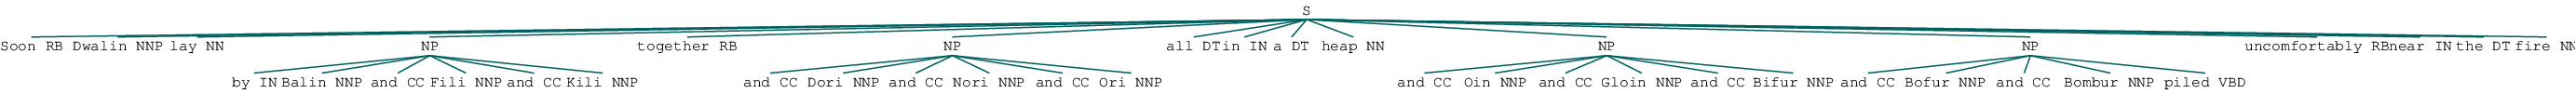

In [117]:
df.loc[592]['chunk']

In [118]:
df['chunks'] = ''

for i in range(len(df)):
    df['chunks'].loc[i] = [" ".join(w for w, t in elt) for elt in df.loc[i]['chunk'] if isinstance(elt, nltk.Tree)]


In [119]:
df['chunks'].loc[592]

['by Balin and Fili and Kili',
 'and Dori and Nori and Ori',
 'and Oin and Gloin and Bifur',
 'and Bofur and Bombur piled']

In [120]:
ne_dict = {}
for i in range(len(df)):
    if len(df.loc[i]['chunks']) >= 1:
        for element in df.loc[i]['chunks']:
            names = element.split(' ')
            new_names = []
            for word in names:
                if word in unique_named_entities:
                    new_names.append(word)
            names = tuple(set(new_names))
            if len(names) > 1:
                if names not in ne_dict.keys():
                    ne_dict[names] = 1
                else:
                    ne_dict[names] += 1

In [121]:
ne_dict

{('Baggins', 'BagEnd'): 1,
 ('Baggins', 'Balin'): 1,
 ('Baggins', 'Bilbo'): 19,
 ('Baggins', 'Bilbo', 'BagEnd'): 1,
 ('Baggins', 'Durin'): 1,
 ('Baggins', 'Dwalin', 'Balin'): 1,
 ('Baggins', 'Thorin'): 2,
 ('Barrelrider', 'Bilbo'): 1,
 ('Beorn', 'Hullo'): 1,
 ('Bert', 'Tom'): 4,
 ('Bert', 'William'): 1,
 ('Bert', 'William', 'Ive'): 1,
 ('Bert', 'William', 'Tom'): 1,
 ('Bifur', 'Bofur'): 4,
 ('Bifur', 'Bombur', 'Bofur'): 3,
 ('Bifur', 'Bombur', 'Gloin', 'Bofur'): 1,
 ('Bifur', 'Dwalin', 'Bofur', 'Balin'): 1,
 ('Bifur', 'Gloin', 'Bofur'): 1,
 ('Bifur', 'Kili', 'Bofur'): 1,
 ('Bifur', 'Ori', 'Bofur'): 1,
 ('Bifur', 'Tom', 'Bombur'): 1,
 ('Bilbo', 'Arkenstone'): 1,
 ('Bilbo', 'Balin'): 3,
 ('Bilbo', 'Bombur'): 1,
 ('Bilbo', 'Carrock'): 1,
 ('Bilbo', 'Greatest', 'Calamities'): 1,
 ('Bilbo', 'Laketown'): 1,
 ('Bofur', 'Bilbo'): 1,
 ('Bofur', 'Bombur'): 3,
 ('Bombur', 'Dwalin'): 1,
 ('Bombur', 'Kili', 'Fili', 'Gloin'): 1,
 ('Bomburand', 'Kili', 'Fili'): 1,
 ('Dori', 'Bilbo'): 1,
 ('Dori', 'Dw

In [122]:
for k, v in sorted(ne_dict.items(), key=itemgetter(1), reverse=True):
    if v > 1:
        print(k, v)

('Kili', 'Fili') 20
('Baggins', 'Bilbo') 19
('Thorin', 'Oakenshield') 11
('Gloin', 'Oin') 9
('Dwalin', 'Balin') 8
('Gandalf', 'Bilbo') 6
('Oin', 'Dori', 'Ori') 5
('Bifur', 'Bofur') 4
('Bert', 'Tom') 4
('Thorin', 'Gandalf') 4
('Bifur', 'Bombur', 'Bofur') 3
('Bofur', 'Bombur') 3
('Thorin', 'Kili', 'Fili') 3
('Bilbo', 'Balin') 3
('Dori', 'Ori') 2
('Thorin', 'Bilbo') 2
('Kili', 'Fili', 'Balin') 2
('Gollum', 'Bilbo') 2
('Gandalf', 'Mirkwood') 2
('Baggins', 'Thorin') 2


### visualise named entities

In [90]:
df_grouped = df.groupby('chapter', as_index=False).sum()

In [91]:
df_grouped.drop(['index', 'compound_score', 'sentences_length'], axis=1, inplace=True)

In [92]:
df_grouped.loc[:,(df_grouped.sum() == 1)].columns

Index(['Ringwinner', 'Bomburand', 'Luckwearer', 'Marshes', 'Calamities', 'Fa1',
       'Ive', 'Barrelrider', 'Grubb', 'Wilderland', 'Greatest',
       'Goblincleaver', 'Tooks', 'Hobbiton', 'Bullroarer', 'Longbeards',
       'Warg', 'Huggins'],
      dtype='object')

In [93]:
df_grouped.drop(df_grouped.loc[:,(df_grouped.sum() == 1)].columns, axis=1, inplace=True)

In [94]:
df_grouped.columns

Index(['chapter', 'pos_score', 'neg_score', 'neu_score', 'Bert', 'Beorn',
       'Tookish', 'Bombur', 'Woodelves', 'Oakenshield', 'Williams',
       'Rivendell', 'Bagginses', 'Bofur', 'Thorins', 'Thorin', 'Dwarves',
       'BagEnd', 'William', 'Carrock', 'Thror', 'Mirkwood', 'Bilbos', 'Kili',
       'Orcrist', 'Bilbo', 'Gondolin', 'Laketown', 'Balin', 'Moria', 'Elrond',
       'Arkenstone', 'Tom', 'Fili', 'Wargs', 'Durin', 'Hullo', 'Bifur', 'Bolg',
       'Dori', 'Lakemen', 'Dwalin', 'Gollum', 'Ori', 'Goblins', 'Gandalf',
       'Gloin', 'Sackville', 'Baggins', 'Oin', 'Esgaroth', 'Smaug'],
      dtype='object')

In [95]:
df_grouped['Bilbo'] = df_grouped['Bilbo'] + df_grouped['Bilbos']
df_grouped['Thorin'] = df_grouped['Thorin'] + df_grouped['Thorins']
df_grouped.drop(['Bilbos', 'Thorins', 'Baggins'], axis=1, inplace=True)

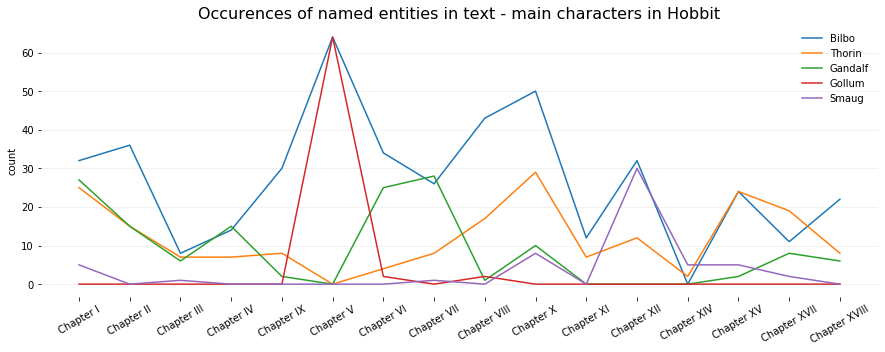

In [96]:
fig, ax = plt.subplots(figsize=(15,5))
for character in ['Bilbo', 'Thorin', 'Gandalf', 'Gollum', 'Smaug']:
    df_plot = df_grouped[['chapter', character]]
    ax.plot(df_grouped['chapter'], df_grouped[character], label=character)
ax.legend(frameon=False)
ax.set_title('Occurences of named entities in text - main characters in Hobbit', fontsize=16)
ax.set_ylabel('count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(alpha=0.2)

ax.set_xticklabels(df_grouped['chapter'], rotation=30);

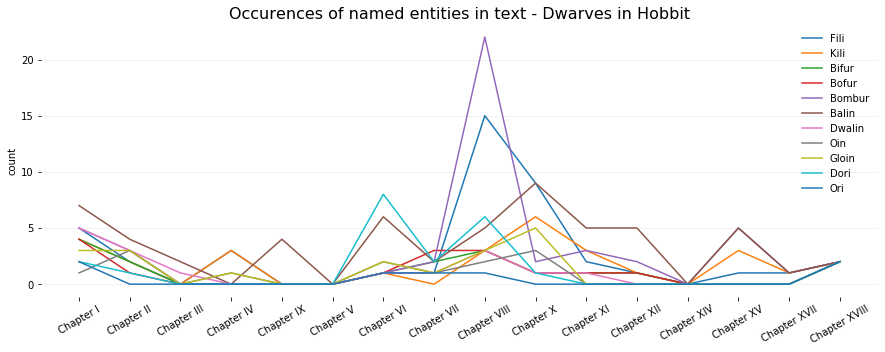

In [97]:
fig, ax = plt.subplots(figsize=(15,5))
for character in ['Fili', 'Kili', 'Bifur', 'Bofur', 'Bombur', 'Balin', 'Dwalin', 'Oin', 'Gloin', 'Dori', 'Ori']:
    df_plot = df_grouped[['chapter', character]]
    ax.plot(df_grouped['chapter'], df_grouped[character], label=character)
ax.legend(frameon=False)
ax.set_title('Occurences of named entities in text - Dwarves in Hobbit', fontsize=16)
ax.set_ylabel('count')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.yaxis.grid(alpha=0.2)
ax.set_xticklabels(df_grouped['chapter'], rotation=30);

In [98]:
df_grouped.columns

Index(['chapter', 'pos_score', 'neg_score', 'neu_score', 'Bert', 'Beorn',
       'Tookish', 'Bombur', 'Woodelves', 'Oakenshield', 'Williams',
       'Rivendell', 'Bagginses', 'Bofur', 'Thorin', 'Dwarves', 'BagEnd',
       'William', 'Carrock', 'Thror', 'Mirkwood', 'Kili', 'Orcrist', 'Bilbo',
       'Gondolin', 'Laketown', 'Balin', 'Moria', 'Elrond', 'Arkenstone', 'Tom',
       'Fili', 'Wargs', 'Durin', 'Hullo', 'Bifur', 'Bolg', 'Dori', 'Lakemen',
       'Dwalin', 'Gollum', 'Ori', 'Goblins', 'Gandalf', 'Gloin', 'Sackville',
       'Oin', 'Esgaroth', 'Smaug'],
      dtype='object')

In [99]:
top_bilbo_chars = df_grouped.iloc[:,4:].sum().sort_values(ascending=False)[0:15].index

In [100]:
top_bilbo_chars

Index(['Bilbo', 'Thorin', 'Gandalf', 'Gollum', 'Smaug', 'Balin', 'Bombur',
       'Fili', 'Beorn', 'Kili', 'Mirkwood', 'Bert', 'Dori', 'Elrond',
       'William'],
      dtype='object')

In [101]:
colors = ["#186A3B", "#1D8348", "#239B56", "#28B463", "#2ECC71", "#58D68D",
         "#82E0AA", "#ABEBC6", "#D5F5E3", "#FCF3CF", "#F9E79F", "#F7DC6F", "#F4D03F", "#F1C40F",
         "#D4AC0D", "#B7950B", "#9A7D0A", "#7D6608"]

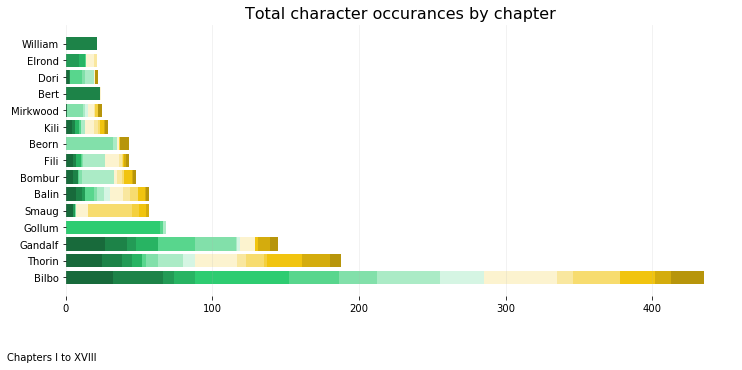

In [102]:
sums_by_chapter = {}
fig, ax = plt.subplots(figsize=(12, 5))
i = 0
sums_by_chapter = {}
for chap in df['chapter'].unique():
    df_plot = df[df['chapter'] == chap]
    for char in top_bilbo_chars:
        df_plot2 = df_plot.groupby('chapter', as_index=False).sum()

        value = df_plot2[char].values[0]

        
        
        if char not in sums_by_chapter.keys():
            sums_by_chapter[char] = 0
        ax.barh(y=char, width=value, left=sums_by_chapter[char], color=colors[i])
        
        sums_by_chapter[char] = value + sums_by_chapter[char]
        
    i += 1
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.xaxis.grid(alpha=0.2)

ax.set_title('Total character occurances by chapter', fontsize=16)

sns.palplot(colors, size=0.2)
ax.text(s='Chapters I to XVIII', x=-40, y=-5);

In [103]:
df['pos'] = np.where(df['pos_score'] > df['neg_score'], 1, 0)
df['neg'] = np.where(df['pos_score'] < df['neg_score'], 1, 0)
df['neu'] = np.where(df['pos_score'] == df['neg_score'], 1, 0)

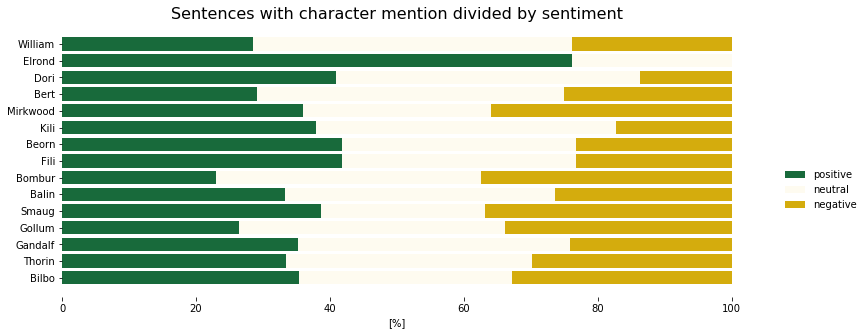

In [104]:
fig, ax = plt.subplots(figsize=(12, 5))

for char in top_bilbo_chars:
    char_df = df[df[char] != 0].loc[:, ['pos', 'neg', 'neu']].sum() / len(df[df[char] != 0]) * 100
    ax.barh(y=char, width=char_df.loc['pos'], color='#186A3B', label='positive')
    ax.barh(y=char, width=char_df.loc['neu'], left=char_df.loc['pos'], color='#FCF3CF', alpha=0.3, label='neutral')
    ax.barh(y=char, width=char_df.loc['neg'], left=char_df.loc['pos'] + char_df.loc['neu'], color='#D4AC0D', 
            label='negative')
    
ax.legend(['positive', 'neutral', 'negative'], frameon=False, bbox_to_anchor=(1.2,0.5))
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(False)
ax.spines['left'].set_visible(False)
ax.set_xlabel('[%]')
ax.set_title('Sentences with character mention divided by sentiment', fontsize=16);